### t2.large, 16Gb disk, AWS Marketplace -> Anaconda with Python 3

### 1) Natural Language Toolkit (NLTK) -> Complete Toolkit for all NLP Techniques

In [1]:
import nltk
nltk.download('treebank')
nltk.corpus.treebank.parsed_sents('wsj_0001.mrg')[0].pretty_print()

                                                     S                                                                         
                         ____________________________|_______________________________________________________________________   
                        |                                               VP                                                   | 
                        |                        _______________________|___                                                 |  
                      NP-SBJ                    |                           VP                                               | 
         _______________|___________________    |     ______________________|______________________________________          |  
        |          |              ADJP      |   |    |        |                PP-CLR                              |         | 
        |          |           ____|____    |   |    |        |          ________|_________          

[nltk_data] Downloading package treebank to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


### 2) spaCy -> Industrial Strength NLP with Python and Cython

In [1]:
import spacy

nlp  = spacy.load('en_core_web_sm')
text = ('When Sebastian Thrun started working on self-driving cars at '
        'Google in 2007, few people outside of the company took him '
        'seriously. “I can tell you very senior CEOs of major American '
        'car companies would shake my hand and turn away because I wasn’t '
        'worth talking to,” said Thrun, in an interview with Recode earlier '
        'this week.')
doc  = nlp(text)

print('Noun Phrases:')
print('-')
print([chunk.text for chunk in doc.noun_chunks])
print('')
print('Verbs:')
print('-')
print([token.lemma_ for token in doc if token.pos_ == 'VERB'])
print('')
print('Entities, Phrases, and Concepts:')
print('-')
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun Phrases:
-
['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']

Verbs:
-
['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'be', 'talk', 'say']

Entities, Phrases, and Concepts:
-
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


### 3) Scikit-learn -> Machine Learning in Python

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect        = CountVectorizer()
tfidf_transformer = TfidfTransformer()

documents    = ['God is love', 'OpenGL on the GPU is fast']
twenty_train = fetch_20newsgroups(
                                  subset     = 'train'                                                              ,
                                  categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med'],
                                  shuffle    = True
                                 )

X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_tfidf  = tfidf_transformer.fit_transform(X_train_counts)

X_test_tfidf = tfidf_transformer.transform(count_vect.transform(documents))
predicted    = MultinomialNB().fit(X_train_tfidf, twenty_train.target).predict(X_test_tfidf)

for doc, category in zip(documents, predicted):
  print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


### 4) Gensim -> Topic Modelling for Humans

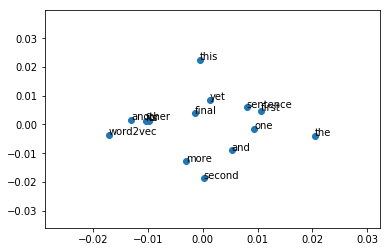

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

sentences = [
             ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence']                  ,
             ['yet', 'another', 'sentence']                               ,
             ['one', 'more', 'sentence']                                  ,
             ['and', 'the', 'final', 'sentence']
            ]

model  = Word2Vec(sentences, min_count=1)
result = PCA(n_components=2).fit_transform(model[model.wv.vocab])
words  = list(model.wv.vocab)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

## 5) Google News Corpus -> requires a lot of memory and disk

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

print ('Number of words in Google News corpus: ' + "{:,}".format(len(model.vocab.keys())))
print ('Similarity between Dog and Cat: ' + "{:.2f}".format(model.similarity('cat', 'dog')))
print ('Similarity between Zebra and Brush: ' + "{:.2f}".format(model.similarity('zebra', 'brush')))

Number of words in Google News corpus: 3,000,000
Similarity between Dog and Cat: 0.76
Similarity between Zebra and Brush: 0.11
